# Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# inline plotting
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning (we'll talk more about these later!)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

#data processing
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, KFold


# Loading data


In [3]:
# get titanic & test csv files as a DataFrame
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

# preview the data
#train_df.head()
test_df.head()

# Aggregate Exploration

In [4]:
# Let's look at the columns (nomenclature: features, classes)
train_df.columns

In [10]:
# Let's get some aggregate data quickly
#train_df.describe()
#test_df.info()
train_df.shape

In [11]:
# checking if there is any missing values in the data sets
train_df.isnull().sum()
#calculation with missing values:When summing data, NA (missing) values will be treated as zero

In [12]:
# Same thing for the test data
test_df.isnull().sum()


# Feature Analysis


## Embarked

In [ ]:
train_df['Embarked'].value_counts()
#finding the most frequent value
#train_df['Embarked'].mode()
train_df.Embarked

In [ ]:
# Visual tools can help us get a better sense of the data

# First let's look at where people boarded from
embarked_count = train_df.groupby(["Embarked"])["Ticket"].count()
ax1 = embarked_count.plot(kind='bar', figsize=(5, 3), fontsize=12)
ax1.set_xlabel("Embarked", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
plt.show()

# Next let's look at where survivors boarded from
embarked_survival = train_df[['Embarked','Survived']].groupby(["Embarked"]).sum()
ax2 = embarked_survival.plot(kind='bar', figsize=(5, 3), fontsize=12)
ax2.set_xlabel("Embarked", fontsize=12)
ax2.set_ylabel("Survived", fontsize=12)
plt.show()

# Finally let's look at your chances of surviving depending on where you boarded
embarked_perc = train_df[["Embarked", "Survived"]].groupby(['Embarked']).mean()
ax3 = embarked_perc.plot(kind='bar', figsize=(5, 3), fontsize=12)
ax3.set_xlabel("Embarked", fontsize=12)
ax3.set_ylabel("Mean Survival Rate", fontsize=12)
plt.show()

In [ ]:
# What to do about those pesky
# null values we found in our aggregate exploration?
train_df.Embarked = train_df.Embarked.fillna("S")
test_df.Embarked = test_df.Embarked.fillna("S")

# How do we look now?
train_df.Embarked.isnull().sum(), test_df.Embarked.isnull().sum()

## Age

In [ ]:
#Moving onto the "Age" category.

# Let's take a look at the total numbers
ax1 = train_df["Age"].dropna().hist()
ax1.set_xlabel("Age", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
plt.show()

# Let's look at those that survived
age_survived = train_df[['Age','Survived']].dropna().groupby(['Age'],as_index=False).sum()
ax2 = age_survived.plot(kind='bar',x="Age", y="Survived" , figsize=(20, 5), fontsize=12)
ax2.set_xlabel("Age", fontsize=12)
ax2.set_ylabel("Survived", fontsize=12)
plt.show()

# Finally let's look at your chances of surviving depending on where your age
age_perct = train_df[['Age','Survived']].dropna().groupby(['Age'],as_index=False).mean()
ax3 = age_perct.plot(kind='bar',x="Age", y="Survived" , figsize=(20, 5), fontsize=12)
ax3.set_xlabel("Age", fontsize=12)
ax3.set_ylabel("Mean Survival", fontsize=12)
plt.show()

In [ ]:
# Let's fill in the null values here aswell.  This can be tricky.  
# There is no right way to do this.  

# Get average,std, and count of NaN's in train_df
average_age_train  = train_df["Age"].mean()
std_age_train      = train_df["Age"].std()
count_nan_age_train = train_df["Age"].isnull().sum()

# Get average,std, and count of NaN's in test_df
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
train_random = np.random.randint(average_age_train - std_age_train,
                    average_age_train + std_age_train, size = count_nan_age_train)
test_random = np.random.randint(average_age_test - std_age_test, 
                    average_age_test + std_age_test, size = count_nan_age_test)

# We can now fill in our NaN values using these randomly generated values
train_df.loc[np.isnan(train_df["Age"]), "Age"] = train_random
test_df.loc[np.isnan(test_df["Age"]), "Age"] = test_random

# Convert from float to int to make things 
train_df['Age'] = train_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)

# How do we look now?
print(train_df.Embarked.isnull().sum(), test_df.Embarked.isnull().sum())

# Let's now look at what our data looks like after this
ax1 = train_df["Age"].dropna().hist()
ax1.set_xlabel("Age", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
plt.show()


## Cabin

In [ ]:
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
train_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

## PClass

In [ ]:
# First let's look at where people boarded from
class_count = train_df.groupby(["Pclass"])["Ticket"].count()
ax1 = class_count.plot(kind='bar', figsize=(5, 3), fontsize=12)
ax1.set_xlabel("Class", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
plt.show()

# Next let's look at where survivors boarded from
class_survival = train_df[['Pclass','Survived']].groupby(["Pclass"]).sum()
ax2 = class_survival.plot(kind='bar', figsize=(5, 3), fontsize=12)
ax2.set_xlabel("Pclass", fontsize=12)
ax2.set_ylabel("Survived", fontsize=12)
plt.show()

# Finally let's look at your chances of surviving depending on where you boarded
class_perc = train_df[["Pclass", "Survived"]].groupby(['Pclass']).mean()
ax3 = class_perc.plot(kind='bar', figsize=(5, 3), fontsize=12)
ax3.set_xlabel("Pclass", fontsize=12)
ax3.set_ylabel("Mean Survival Rate", fontsize=12)
plt.show()

## Fare

In [ ]:
# First let's look at where people boarded from
# We'll first create percentil bins and group all our fares into one of these 20 
# percentile bins.
step_size = 50
bins = np.arange(train_df.Fare.min(),train_df.Fare.max()+step_size,step_size)

fare_count =  train_df.groupby(pd.cut(train_df['Fare'], bins))["Ticket"].count()
ax1 = fare_count.plot(kind='bar', figsize=(20, 5), fontsize=12)
ax1.set_xlabel("Fare Percentile", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
plt.show()

# Next let's look at where survivors boarded from
fare_survival = train_df[["Fare", "Survived"]].groupby(pd.cut(train_df['Fare'], bins)).sum()
ax2 = fare_survival.plot(kind='bar', y="Survived" , figsize=(20, 5), fontsize=12)
ax2.set_xlabel("Fare Percentile", fontsize=12)
ax2.set_ylabel("Survived", fontsize=12)
plt.show()

# Finally let's look at your chances of surviving depending on where you boarded
fare_perc = train_df[["Fare", "Survived"]].groupby(pd.cut(train_df['Fare'], bins)).mean()
ax3 = fare_perc.plot(kind='bar', y="Survived" , figsize=(20, 5), fontsize=12)
ax3.set_xlabel("Fare Percentile", fontsize=12)
ax3.set_ylabel("Mean Survival Rate", fontsize=12)
plt.show()

In [ ]:
# There was one sneaky NaN "Fare" in the test data.  Let's fill this using the median value
test_df.loc[np.isnan(test_df["Fare"]), "Fare"] = test_df.Fare.median()

#Question: Why median instead of mean?

## Family

In [ ]:
# Family

# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
train_df['Family'] =  train_df["Parch"] + train_df["SibSp"]
train_df['Family'].loc[train_df['Family'] > 0] = 1
train_df['Family'].loc[train_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

# drop Parch & SibSp
train_df = train_df.drop(['SibSp','Parch'], axis=1)
test_df  = test_df.drop(['SibSp','Parch'], axis=1)

# Plots

# Total number of individuals with family on board
family_count = train_df.groupby(["Family"])["Ticket"].count()
ax1 = family_count.plot(kind='bar', figsize=(5, 3), fontsize=12)
ax1.set_xlabel("Family", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
plt.show()

# Number of survivors based on whether or not they had family on board
family_survival = train_df[["Family", "Survived"]].groupby(['Family']).sum()
ax2 = family_survival.plot(kind='bar', figsize=(5, 3), fontsize=12)
ax2.set_xlabel("Family", fontsize=12)
ax2.set_ylabel("Survived", fontsize=12)
plt.show()

# Average number of survivors based on having family on board
family_perc = train_df[["Family", "Survived"]].groupby(['Family']).mean()
ax3 = family_perc.plot(kind='bar', figsize=(5, 3), fontsize=12)
ax3.set_xlabel("Family", fontsize=12)
ax3.set_ylabel("Mean Survival Rate", fontsize=12)
plt.show()


## Sex

In [ ]:
# As we saw previously, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child in order to seperate the men 
# from the boys.  Unfortunately, men don't traditionally fair so well in maritime disasters

# Here we can create our own custom function
# Can you figure out what this function does?
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
# Let's create a new feature called "Person"
train_df['Person'] = train_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']  = test_df[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
train_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

# Create dummy variables for our "Person" feature. The goal is to create 2 new
# features "Child" and "Female" that we will ultimately use to train our model.
# These features will only output a 1 if that person falls into this category, and
# a 0 otherwise.  We don't need the "Male" feature since 2 zeros in both "Child" and
# "Female" will be enough information to indicate maleness.  

person_dummies_titanic  = pd.get_dummies(train_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

# We can now add these features using the .join() method
train_df = train_df.join(person_dummies_titanic)
test_df = test_df.join(person_dummies_test)

# Let's plot these now


# Total number of individuals with family on board
person_count = train_df.groupby(["Person"])["Ticket"].count()
ax1 = person_count.plot(kind='bar', figsize=(5, 3), fontsize=12)
ax1.set_xlabel("Person", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
plt.show()

# Number of survivors based on whether or not they had family on board
person_survival = train_df[["Person", "Survived"]].groupby(['Person']).sum()
ax2 = person_survival.plot(kind='bar', figsize=(5, 3), fontsize=12)
ax2.set_xlabel("Person", fontsize=12)
ax2.set_ylabel("Survived", fontsize=12)
plt.show()

# Average number of survivors based on having family on board
person_perc = train_df[["Person", "Survived"]].groupby(['Person']).mean()
ax3 = person_perc.plot(kind='bar', figsize=(5, 3), fontsize=12)
ax3.set_xlabel("Person", fontsize=12)
ax3.set_ylabel("Mean Survival Rate", fontsize=12)
plt.show()



# Overview and finishing touches

In [ ]:
# Let's see what our data looks like now.
train_df.head()

In [ ]:
# We can now drop the features that we don't find very useful like "Name", "Ticket", and
# "Person" (since this information is captured in "Child" and "Female")

train_df.drop("Name",axis=1,inplace=True)
test_df.drop("Name",axis=1,inplace=True)
train_df.drop("Ticket",axis=1,inplace=True)
test_df.drop("Ticket",axis=1,inplace=True)
train_df.drop("Person",axis=1,inplace=True)
test_df.drop("Person",axis=1,inplace=True)

In [ ]:
# Let's see where we are at
train_df.head()

In [ ]:
# It might be nice to "one-hot-encode" our "Pclass" feature.  
# Question: Why might we want to do this?

# We'll make sure of SK-Learns binarizer
lb = LabelBinarizer()
train_df['Class1'] = lb.fit_transform(train_df['Pclass'])[:,0]
train_df['Class2'] = lb.fit_transform(train_df['Pclass'])[:,1]
train_df['Class3'] = lb.fit_transform(train_df['Pclass'])[:,2]

test_df['Class1'] = lb.fit_transform(test_df['Pclass'])[:,0]
test_df['Class2'] = lb.fit_transform(test_df['Pclass'])[:,1]
test_df['Class3'] = lb.fit_transform(test_df['Pclass'])[:,2]

# Since we don't need "Pclass" anymore, let's drop it
train_df.drop("Pclass",axis=1,inplace=True)
test_df.drop("Pclass",axis=1,inplace=True)


In [ ]:
# Check to see what our data looks like here

In [ ]:
# Up to you to decide what to do with "Embarked" feature. 
# Either keep it and "one-hot" it, or drop it.  We drop it out of laziness.
train_df.drop("Embarked",axis=1,inplace=True)
test_df.drop("Embarked",axis=1,inplace=True)

## Scaling our data

In [ ]:
# One last thing that we might want to do is scale our data.  
# Why might this be desirable?  What can go wrong otherwise?
# What can go wrong doing this?

train_scaling = train_df[["Age","Fare"]].copy()
test_scaling = test_df[["Age","Fare"]].copy()
scaler = MinMaxScaler()

train_scaling.loc[:,:] = scaler.fit_transform(train_scaling.values)
test_scaling.loc[:,:] = scaler.fit_transform(test_scaling.values)

#Let's see what this dataframe looks like
test_scaling.head()

In [ ]:
# Ok time to exchange our old un-scaled values out for our newly scaled data

train_df["Age"] = train_scaling["Age"]
train_df["Fare"] = train_scaling["Fare"]

test_df["Age"] = test_scaling["Age"]
test_df["Fare"] = test_scaling["Fare"]

In [ ]:
# Finally, as a last sanity check, let's take a look at our data a final time.
train_df.head()

# Machine Learning

In [ ]:
 """We are now ready to embark on creating models to predict survival on our test set.
 We will be using our training data features along with our classification labels 
 ("Survived" = 1 or 0) to train a model which can generalize.  The goal is to then feed
 in our test data which does not have any classification labels, and see how well our
 model can predict survival rates.  There are many different methods to do this, and
 today we'll only discuss the most basics algorithms from the Sk-Learn library."""

## Splitting the data into labels and features

In [ ]:
# As a first step we split the data into our training features (variables we wish to 
# use to train our model), and training labels (survived or not).
X_train = train_df[["Age","Fare","Female", "Family","Child","Class1","Class2","Class3"]].copy()
Y_train = train_df[["Survived"]].copy()

# We do the same thing with the test data, but of course are missing our labels (that's
# what we wish to predict!)
X_test = test_df[["Age","Fare","Female", "Family","Child","Class1","Class2","Class3"]].copy()

# Question: why use .copy()?

In [ ]:
# How can we quickly assess the quality of our models without having to submit our 
# results every time to Kaggle and wait for their response?  Let's further split
# our X_train and Y_train into a 70%-30% split.  This way we can train on 70%
# chunk and then test it on the 30% chunk.  This 30% chunk is known as the "validation set".

X_subtrain, X_validation, Y_subtrain, Y_validation = train_test_split(X_train, Y_train, 
                                                    test_size=0.30, random_state=42)

## Random Forests

An example of how random forests can be used to determine the type of fruit you have:

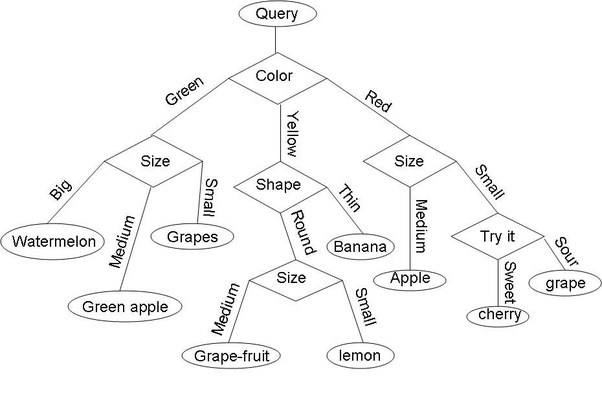

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_subtrain, Y_subtrain.Survived)

Y_predict = random_forest.predict(X_validation)

print("training accuracy: {}".format(random_forest.score(X_subtrain, Y_subtrain)))
print("validation accuracy: {}".format(accuracy_score(Y_validation, Y_predict)))
print(confusion_matrix(Y_validation, Y_predict))

## Logistic Regression

Logistic regression attempts to create a probability curve for the likelyhood of an event occuring. 
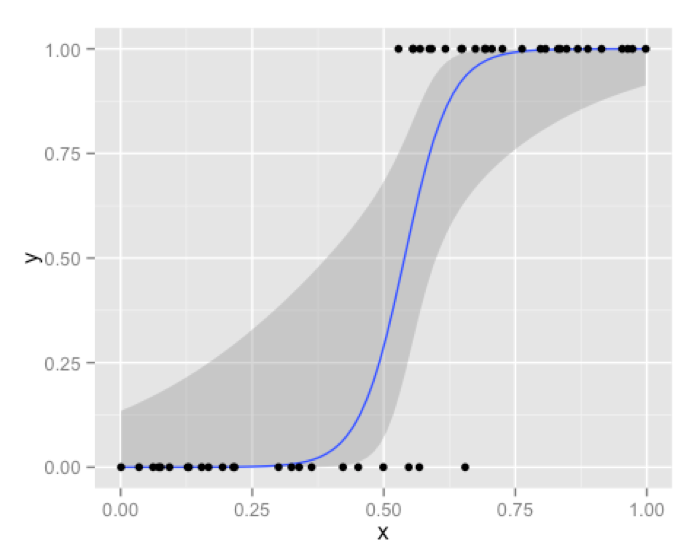



Logistic regression simply attempts to fit the best parameters such that:
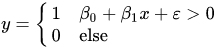


In [ ]:
logreg = LogisticRegression()

logreg.fit(X_subtrain, Y_subtrain.Survived)

Y_predict = logreg.predict(X_validation)

print("training accuracy: {}".format(logreg.score(X_subtrain, Y_subtrain)))
print("validation accuracy: {}".format(accuracy_score(Y_validation, Y_predict)))
print(confusion_matrix(Y_validation, Y_predict))

## Support Vector Machines

Maximizing your win/lose window:
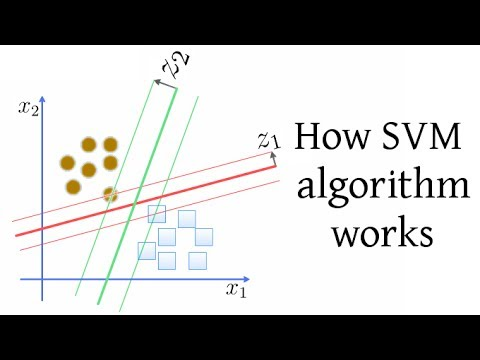

In [ ]:
svc = SVC()

svc.fit(X_subtrain, Y_subtrain.Survived)

Y_predict = svc.predict(X_validation)

print("training accuracy: {}".format(svc.score(X_subtrain, Y_subtrain)))
print("validation accuracy: {}".format(accuracy_score(Y_validation, Y_predict)))
print(confusion_matrix(Y_validation, Y_predict))

## K-Nearest Neighbors

Democracy in action!
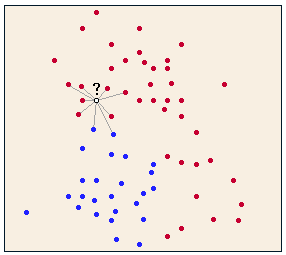

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_subtrain, Y_subtrain.Survived)

Y_predict = knn.predict(X_validation)

print("training accuracy: {}".format(knn.score(X_subtrain, Y_subtrain)))
print("validation accuracy: {}".format(accuracy_score(Y_validation, Y_predict)))
print(confusion_matrix(Y_validation, Y_predict))

# Bias and Variance - the eternal battle

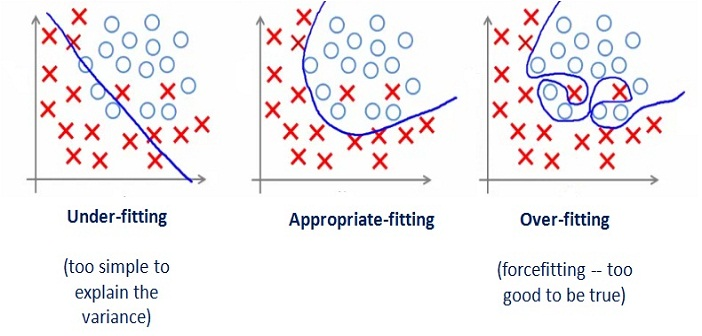

Bias  - erroneous assumptions in the learning algorithm.  This is seen in the leftmost image.

Variance - fitting the noise in the data.  This is seen in the rightmost image.

## Summary

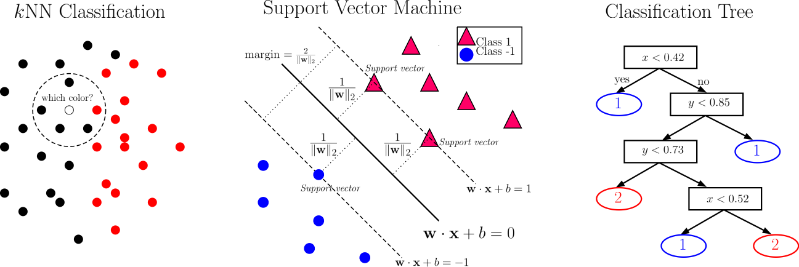

# Training and submitting our results

Now we are ready to pick our alogorithm and train our model on the full test data.  This is left up to you as an 
exercise.  Use the cells below to implement this using what you've learned above and finally submit your
results via the script in the final cell below.  Good Luck!!

In [ ]:
# Your code here:



In [ ]:
# Finally we can submit our results

# submission = pd.DataFrame({
#         "PassengerId": test_df["PassengerId"],
#         "Survived": Y_predict
#     })
# submission.to_csv('titanic.csv', index=False)